# Evaluation of simple linear regression
In this example, we are again using a dataset with [YouTube statistics from the top 5000 channels](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade)

In [2]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('youtube.csv')

We will make the numbers small again, for ease of reading. So, subscribers in millions and views in billions.

In [4]:
df['subscribers_m'] = df['subscribers'] / 1000000
df['views_b'] = df['views'] / 1000000000

Let's look again at the relationship between subscribers and views. This time, I'll include the regression line with a _confidence interval_ (Seaborn does this automically)

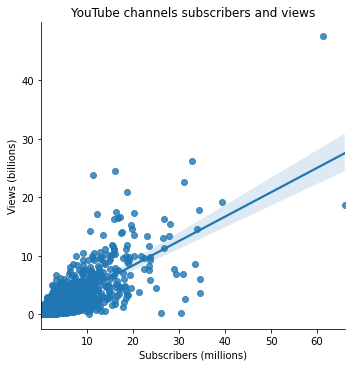

In [7]:
sns.lmplot(x='subscribers_m', y='views_b', data=df)
plt.title('YouTube channels subscribers and views')
plt.xlabel("Subscribers (millions)")
plt.ylabel("Views (billions)")
plt.show()

The band around the regression line is called a "confidence interval" and gives an uncertainty range for the regression line.

Let's evaluate the linear regression assumptions:

1. Linearity: the points are around a straight line. **This seems to be okay**
2. Equal variance: the distance between the points and the line does not change very much. **This is definitely not the case for higher numbers of subscribers**
3. Normality of residuals: we won't delve into this one (it's less important), I just note it for completeness. But it's pretty okay. The residuals are normally distributed.

So, what does it mean that assumption (2) is violated? Well, it means the individual predictions might be more off than would normally be expected. We can see this in the graph, by noting that the predictions seem to get worse the higher we get. We can check this by modelling the relation and calculating the residuals.

In [8]:
x = df[['subscribers_m']] #get the subscrivers
y = df['views_b'] #get the views
lm = LinearRegression() #create a new (empty model)
lm.fit(x, y) #fit the model

df['views_p'] = lm.predict(x) #generate the predictions and add them to the dataframe
df['resid'] = df['views_b'] - df['views_p'] #get the residuals by subtracting the prediction from the actual views

Now we can make _plots_ of the residuals.

Remember: residuals are the "errors" of your model, how much your model is "off": the distance to the line. 

Plotting your residuals against different variables is a very good way of finding out where your model makes errors.Let's plot it against our independent variable, subscribers:

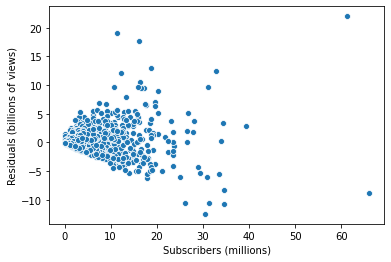

In [11]:
sns.scatterplot(x='subscribers_m',y='resid',data=df)
plt.xlabel('Subscribers (millions)')
plt.ylabel('Residuals (billions of views)')
plt.show()


As we can see, the residuals increase (both positive and negative) with increasing subscribers. So, our "errors" get bigger with bigger numbers of subscribers. Something we already knew, but this plot makes it even more clear.

Finally, let's plot _predicted views_ against actual _views_. 

In [2]:
sns.scatterplot(x='views_b',y='views_p',data=df)
plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 5000000000)
plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 25], [0, 25], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Views in billions')
plt.ylabel('Views in billions (predicted)')
plt.show()

NameError: name 'sns' is not defined

What do we see here? On the x-axis we have the actual views. On the y-axis we have the _predicted_ views for that channel. If the model is perfect, all points should be on the line. Obviously, they are not.

We can conclude that our model _overshoots_ (predicts too high) for low numbers of views, and _undershoots_ for high numbers of views (predicts too low).

Now to predict the R^2 and RMSE

In [18]:
r2_score(df['views_b'], df['views_p']) #this gives the model fit (R2) for the Y and predicted Y



0.6260625597036102

The R^2 is 0.62, which means 62% of the variation in views is explained by the model. That's pretty good!

In [20]:
math.sqrt(mean_squared_error(df['views_b'], df['views_p'])) #this gives the model fit (R2) for the Y and predicted Y

1.2648852393768637

The RMSE is 1.26 billion. Which means that we are typically about 1.26 billion off in our predicted views.